Name    : **Richard Edgina Virgo**  
Batch   : **006**  


---
---

<pre>
</pre>

Here is link for Tableau : [Visualization](https://public.tableau.com/app/profile/richard.edgina.virgo/viz/DashboardHealthCare/DashboardHealthCare?publish=yes)

### ***Problem Identification***

---

This program has been created to analyse and evaluate healthcare data retrieved from the Kaggle website. The healthcare data retrieved contains the patient's personal data along with the hospital and treatment costs. This makes me interested in analysing this data. In order to analyse the data, the SMART method will be used, namely **analyse the correlation between the data contained in the health care dataset**, **perform descriptive and inferential statistical tests**, **analyse the relationship between variables**, **using Chi-Square and Pearson tests can successfully analyse the correlation between these variables**, **successfully analyse the data and visualise it before Thursday at 23:59**. Here are the questions I will be answering:  
1. What is the sex, age and blood group of the patients in the data?
2. What are the medical conditions of the patients based on age?
3. Which hospital has the most expensive treatment costs?
4. Which drugs are used based on the disease suffered
5. Is there a correlation between age and bill amount?
6. What is the correlation between medication and test result?

---

The first step is to obtain the data, which can be done using SQL and Pandas. The data loading process is as follows:

---
---

<pre>
</pre>

### ***Data Loading***
---

The following is the data loading process using an **SQL query**:

```sql
SELECT * 
FROM healthcare_dataset
```

The following is the data loading process using **pandas** to access a CSV file:

In [61]:
# Importing pandas to load data
import pandas as pd
# Importing seaborn to plot data
import seaborn as sns
# Importing matplotlib to plot data
import matplotlib.pyplot as plt
# Importing scipy to mathematical equation
from scipy import stats

After importing the necessary libraries, the next step is to **create a data frame** containing the **health care dataset**

In [62]:
# Show the data frame
df = pd.read_csv("healthcare_dataset.csv")
df

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,Bobby JacksOn,30,Male,B-,Cancer,2024-01-31,Matthew Smith,Sons and Miller,Blue Cross,18856.281306,328,Urgent,2024-02-02,Paracetamol,Normal
1,LesLie TErRy,62,Male,A+,Obesity,2019-08-20,Samantha Davies,Kim Inc,Medicare,33643.327287,265,Emergency,2019-08-26,Ibuprofen,Inconclusive
2,DaNnY sMitH,76,Female,A-,Obesity,2022-09-22,Tiffany Mitchell,Cook PLC,Aetna,27955.096079,205,Emergency,2022-10-07,Aspirin,Normal
3,andrEw waTtS,28,Female,O+,Diabetes,2020-11-18,Kevin Wells,"Hernandez Rogers and Vang,",Medicare,37909.782410,450,Elective,2020-12-18,Ibuprofen,Abnormal
4,adrIENNE bEll,43,Female,AB+,Cancer,2022-09-19,Kathleen Hanna,White-White,Aetna,14238.317814,458,Urgent,2022-10-09,Penicillin,Abnormal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55495,eLIZABeTH jaCkSOn,42,Female,O+,Asthma,2020-08-16,Joshua Jarvis,Jones-Thompson,Blue Cross,2650.714952,417,Elective,2020-09-15,Penicillin,Abnormal
55496,KYle pEREz,61,Female,AB-,Obesity,2020-01-23,Taylor Sullivan,Tucker-Moyer,Cigna,31457.797307,316,Elective,2020-02-01,Aspirin,Normal
55497,HEATher WaNG,38,Female,B+,Hypertension,2020-07-13,Joe Jacobs DVM,"and Mahoney Johnson Vasquez,",UnitedHealthcare,27620.764717,347,Urgent,2020-08-10,Ibuprofen,Abnormal
55498,JENniFER JOneS,43,Male,O-,Arthritis,2019-05-25,Kimberly Curry,"Jackson Todd and Castro,",Medicare,32451.092358,321,Elective,2019-05-31,Ibuprofen,Abnormal


---
---

After loading the data, the next steps are **understanding the data**

---

<pre>
</pre>

### ***Data Understanding***

---

**Dataset Description**     : This dataset consists of **55.500 records**, each representing a patient healthcare record. It includes various attributes, such as patient demographics, medical conditions, admission details, and more.  

**Dataset Information**     : Berikut penjelasan singkat tiap kolum yang terdapat di data  

1. **Name**                 : This column represents the name of the patient associated with the healthcare record.  

2. **Age**                  : The age of the patient at the time of admission, expressed in years.  
3. **Gender**               : Indicates the gender of the patient, either **Male** or **Female**.  
4. **Blood Type**: The patient's blood type, which can be one of the common blood types (e.g., **A+**, **O-**, etc.).  
5. **Medical Condition**    : This column specifies the primary medical condition or diagnosis associated with the patient, such as **Diabetes**,  **Hypertension**, **Asthma**," and more.  
6. **Date of Admission**    : The date on which the patient was admitted to the healthcare facility.  
7. **Doctor**: The name of the doctor responsible for the patient's care during their admission.  
8. **Hospital**: Identifies the healthcare facility or hospital where the patient was admitted.  
9. **Insurance Provider**   : This column indicates the patient's insurance provider, which can be one of several options, including **Aetna**, **Blue Cross**, **Cigna**, **UnitedHealthcare**, and **Medicare**.
10. **Billing Amount**      : The amount of money billed for the patient's healthcare services during their admission. This is expressed as a floating-point number.  
11. **Room Number**         : The room number where the patient was accommodated during their admission.  
12. **Admission Type**      : Specifies the type of admission, which can be **Emergency**, **Elective**, or **Urgent**, reflecting the circumstances of the admission.  
13. **Discharge Date**      : The date on which the patient was discharged from the healthcare facility, based on the admission date and a random number of days within a realistic range.  
14. **Medication**          : Identifies a medication prescribed or administered to the patient during their admission. Examples include **Aspirin** **Ibuprofen**, **Penicillin**, **Paracetamol**, and **Lipitor**. 
15. **Test Results**        : Describes the results of a medical test conducted during the patient's admission. Possible values include **Normal** **Abnormal**, or **Inconclusive**, indicating the outcome of the test.  

Here is the link : [Kaggle](https://www.kaggle.com/datasets/prasad22/healthcare-dataset)

---
---

 After understanding the data, the next step are **data exploration** and **data cleaning**

---

<pre>
</pre>

### ***Data Exploration and Cleaning***
---

In [63]:
# Data frame invocation
df

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,Bobby JacksOn,30,Male,B-,Cancer,2024-01-31,Matthew Smith,Sons and Miller,Blue Cross,18856.281306,328,Urgent,2024-02-02,Paracetamol,Normal
1,LesLie TErRy,62,Male,A+,Obesity,2019-08-20,Samantha Davies,Kim Inc,Medicare,33643.327287,265,Emergency,2019-08-26,Ibuprofen,Inconclusive
2,DaNnY sMitH,76,Female,A-,Obesity,2022-09-22,Tiffany Mitchell,Cook PLC,Aetna,27955.096079,205,Emergency,2022-10-07,Aspirin,Normal
3,andrEw waTtS,28,Female,O+,Diabetes,2020-11-18,Kevin Wells,"Hernandez Rogers and Vang,",Medicare,37909.782410,450,Elective,2020-12-18,Ibuprofen,Abnormal
4,adrIENNE bEll,43,Female,AB+,Cancer,2022-09-19,Kathleen Hanna,White-White,Aetna,14238.317814,458,Urgent,2022-10-09,Penicillin,Abnormal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55495,eLIZABeTH jaCkSOn,42,Female,O+,Asthma,2020-08-16,Joshua Jarvis,Jones-Thompson,Blue Cross,2650.714952,417,Elective,2020-09-15,Penicillin,Abnormal
55496,KYle pEREz,61,Female,AB-,Obesity,2020-01-23,Taylor Sullivan,Tucker-Moyer,Cigna,31457.797307,316,Elective,2020-02-01,Aspirin,Normal
55497,HEATher WaNG,38,Female,B+,Hypertension,2020-07-13,Joe Jacobs DVM,"and Mahoney Johnson Vasquez,",UnitedHealthcare,27620.764717,347,Urgent,2020-08-10,Ibuprofen,Abnormal
55498,JENniFER JOneS,43,Male,O-,Arthritis,2019-05-25,Kimberly Curry,"Jackson Todd and Castro,",Medicare,32451.092358,321,Elective,2019-05-31,Ibuprofen,Abnormal


Data above reveals that there are **15 columns** and **55500 rows**. Further, a deeper data exploration will be conducted

In [64]:
# This code is used to view the information contained in the data.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55500 entries, 0 to 55499
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Name                55500 non-null  object 
 1   Age                 55500 non-null  int64  
 2   Gender              55500 non-null  object 
 3   Blood Type          55500 non-null  object 
 4   Medical Condition   55500 non-null  object 
 5   Date of Admission   55500 non-null  object 
 6   Doctor              55500 non-null  object 
 7   Hospital            55500 non-null  object 
 8   Insurance Provider  55500 non-null  object 
 9   Billing Amount      55500 non-null  float64
 10  Room Number         55500 non-null  int64  
 11  Admission Type      55500 non-null  object 
 12  Discharge Date      55500 non-null  object 
 13  Medication          55500 non-null  object 
 14  Test Results        55500 non-null  object 
dtypes: float64(1), int64(2), object(12)
memory usage: 6.4

The data above indicates that there are **14 columns**: **Name**, **Age**, **Gender**, **Blood Type**, **Medical Condition**, **Date of Admission**, **Doctor**, **Hospital**, **Insurance Provider**, **Billing Amount**, **Room Number**, **Admission Type**, **Discharge Date**, **Medication**, and **Test Result**. From the data above, it's observed that there are no null values. The data types are also consistent with their respective objects except for Date of Admission and Discharge Date.

Due to inconsistent data types, the data type of Date of Admission and Discharge Date, originally **objects**, will be converted to **datetime** data type.

In [65]:
# Converting Date of Admission and Discharge Date object data type to datetime data type
df['Date of Admission']  = pd.to_datetime(df['Date of Admission'])
df['Discharge Date']  = pd.to_datetime(df['Discharge Date'])

In the Name column, there are capital letters that are not in the correct position, so it is necessary to change the names according to the standard title case writing.

In [66]:
# Changing the sentence structure according to title case writing conventions
df['Name'] = df['Name'].str.title()
df

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,Bobby Jackson,30,Male,B-,Cancer,2024-01-31,Matthew Smith,Sons and Miller,Blue Cross,18856.281306,328,Urgent,2024-02-02,Paracetamol,Normal
1,Leslie Terry,62,Male,A+,Obesity,2019-08-20,Samantha Davies,Kim Inc,Medicare,33643.327287,265,Emergency,2019-08-26,Ibuprofen,Inconclusive
2,Danny Smith,76,Female,A-,Obesity,2022-09-22,Tiffany Mitchell,Cook PLC,Aetna,27955.096079,205,Emergency,2022-10-07,Aspirin,Normal
3,Andrew Watts,28,Female,O+,Diabetes,2020-11-18,Kevin Wells,"Hernandez Rogers and Vang,",Medicare,37909.782410,450,Elective,2020-12-18,Ibuprofen,Abnormal
4,Adrienne Bell,43,Female,AB+,Cancer,2022-09-19,Kathleen Hanna,White-White,Aetna,14238.317814,458,Urgent,2022-10-09,Penicillin,Abnormal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55495,Elizabeth Jackson,42,Female,O+,Asthma,2020-08-16,Joshua Jarvis,Jones-Thompson,Blue Cross,2650.714952,417,Elective,2020-09-15,Penicillin,Abnormal
55496,Kyle Perez,61,Female,AB-,Obesity,2020-01-23,Taylor Sullivan,Tucker-Moyer,Cigna,31457.797307,316,Elective,2020-02-01,Aspirin,Normal
55497,Heather Wang,38,Female,B+,Hypertension,2020-07-13,Joe Jacobs DVM,"and Mahoney Johnson Vasquez,",UnitedHealthcare,27620.764717,347,Urgent,2020-08-10,Ibuprofen,Abnormal
55498,Jennifer Jones,43,Male,O-,Arthritis,2019-05-25,Kimberly Curry,"Jackson Todd and Castro,",Medicare,32451.092358,321,Elective,2019-05-31,Ibuprofen,Abnormal


It can be seen that the sentence structure is correct. Now, let's check if there are any duplicate data.

In [67]:
# Calculate duplicated data
df.duplicated().sum()

534

It's found that there are **534** duplicate data entries. Now, we'll proceed with removing the rows that contain duplicate data.

In [68]:
# Removing the rows that contain duplicate data
df.drop_duplicates(inplace=True)

After removal, we will check again to ensure that there are no remaining duplicate data entries.

In [69]:
# Calculate duplicated data
df.duplicated().sum()

0

It's found that there are no duplicate data entries. Now, we'll proceed with calling data frame

In [70]:
df

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,Bobby Jackson,30,Male,B-,Cancer,2024-01-31,Matthew Smith,Sons and Miller,Blue Cross,18856.281306,328,Urgent,2024-02-02,Paracetamol,Normal
1,Leslie Terry,62,Male,A+,Obesity,2019-08-20,Samantha Davies,Kim Inc,Medicare,33643.327287,265,Emergency,2019-08-26,Ibuprofen,Inconclusive
2,Danny Smith,76,Female,A-,Obesity,2022-09-22,Tiffany Mitchell,Cook PLC,Aetna,27955.096079,205,Emergency,2022-10-07,Aspirin,Normal
3,Andrew Watts,28,Female,O+,Diabetes,2020-11-18,Kevin Wells,"Hernandez Rogers and Vang,",Medicare,37909.782410,450,Elective,2020-12-18,Ibuprofen,Abnormal
4,Adrienne Bell,43,Female,AB+,Cancer,2022-09-19,Kathleen Hanna,White-White,Aetna,14238.317814,458,Urgent,2022-10-09,Penicillin,Abnormal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55495,Elizabeth Jackson,42,Female,O+,Asthma,2020-08-16,Joshua Jarvis,Jones-Thompson,Blue Cross,2650.714952,417,Elective,2020-09-15,Penicillin,Abnormal
55496,Kyle Perez,61,Female,AB-,Obesity,2020-01-23,Taylor Sullivan,Tucker-Moyer,Cigna,31457.797307,316,Elective,2020-02-01,Aspirin,Normal
55497,Heather Wang,38,Female,B+,Hypertension,2020-07-13,Joe Jacobs DVM,"and Mahoney Johnson Vasquez,",UnitedHealthcare,27620.764717,347,Urgent,2020-08-10,Ibuprofen,Abnormal
55498,Jennifer Jones,43,Male,O-,Arthritis,2019-05-25,Kimberly Curry,"Jackson Todd and Castro,",Medicare,32451.092358,321,Elective,2019-05-31,Ibuprofen,Abnormal


The data above shows that even though duplicate data has been removed, the index still indicates 55,500 entries. Therefore, it's necessary to reset the index.

In [71]:
# Creating new index
df.reset_index(inplace=True)
# Deleting the old index column.
del df['index']

In [72]:
df

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,Bobby Jackson,30,Male,B-,Cancer,2024-01-31,Matthew Smith,Sons and Miller,Blue Cross,18856.281306,328,Urgent,2024-02-02,Paracetamol,Normal
1,Leslie Terry,62,Male,A+,Obesity,2019-08-20,Samantha Davies,Kim Inc,Medicare,33643.327287,265,Emergency,2019-08-26,Ibuprofen,Inconclusive
2,Danny Smith,76,Female,A-,Obesity,2022-09-22,Tiffany Mitchell,Cook PLC,Aetna,27955.096079,205,Emergency,2022-10-07,Aspirin,Normal
3,Andrew Watts,28,Female,O+,Diabetes,2020-11-18,Kevin Wells,"Hernandez Rogers and Vang,",Medicare,37909.782410,450,Elective,2020-12-18,Ibuprofen,Abnormal
4,Adrienne Bell,43,Female,AB+,Cancer,2022-09-19,Kathleen Hanna,White-White,Aetna,14238.317814,458,Urgent,2022-10-09,Penicillin,Abnormal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54961,Elizabeth Jackson,42,Female,O+,Asthma,2020-08-16,Joshua Jarvis,Jones-Thompson,Blue Cross,2650.714952,417,Elective,2020-09-15,Penicillin,Abnormal
54962,Kyle Perez,61,Female,AB-,Obesity,2020-01-23,Taylor Sullivan,Tucker-Moyer,Cigna,31457.797307,316,Elective,2020-02-01,Aspirin,Normal
54963,Heather Wang,38,Female,B+,Hypertension,2020-07-13,Joe Jacobs DVM,"and Mahoney Johnson Vasquez,",UnitedHealthcare,27620.764717,347,Urgent,2020-08-10,Ibuprofen,Abnormal
54964,Jennifer Jones,43,Male,O-,Arthritis,2019-05-25,Kimberly Curry,"Jackson Todd and Castro,",Medicare,32451.092358,321,Elective,2019-05-31,Ibuprofen,Abnormal


Now, we will examine whether the data contains any outliers, focusing on the numerical values. I have excluded the room number column because it is not relevant to the issue under discussion. Before that, we will test the skewness of the data.

In [73]:
# Skewness Test
df['Age'].skew()

-0.005677678307097651

The skewness test result is **-0.005677**, which is very close to zero, indicating that the data distribution is normal.

In [74]:
# Skewness Test
df['Billing Amount'].skew()

-0.001304484496984179

The skewness test result is **-0.001**, which is very close to zero, indicating that the data distribution is normal.

Because the data distribution is normal, we will now test for outliers using the **Z-score**. First, we need to determine the lower boundary and upper boundary.

Now, we will calculate the lower and upper boundaries for Age.

In [75]:
# Calculate average and standard deviation
avg = df['Age'].mean()
std = df['Age'].std()
# Calculate upper boundary and lower boundary
up_bound = avg + 3*std
low_bound = avg - 3*std
# Printing upper and lower boundary
print(f'Upper Boundary: {up_bound:.2f}' )
print(f'Lower Boundary: {low_bound:.2f}')

Upper Boundary: 110.35
Lower Boundary: -7.28


Now, we will calculate the outliers.

In [76]:
# Checking outlier
outlier = df['Age'][(df['Age']<low_bound) | (df['Age']>up_bound)]
# Count outlier
outlier.count()

0

It is found that there are no outliers in the data.

Now, we will calculate the lower and upper boundaries for Billing Amount

In [77]:
# Calculate average and standard deviation
avg = df['Billing Amount'].mean()
std = df['Billing Amount'].std()
# Calculate upper boundary and lower boundary
up_bound = avg + 3*std
low_bound = avg - 3*std
# Printing upper and lower boundary
print(f'Upper Boundary: {up_bound:.2f}' )
print(f'Lower Boundary: {low_bound:.2f}')

Upper Boundary: 68169.54
Lower Boundary: -17080.92


Now, we calculate the outliers

In [78]:
# Checking outlier
outlier = df['Billing Amount'][(df['Billing Amount']<low_bound) | (df['Billing Amount']>up_bound)]
# Count outlier
outlier.count()

0

It is found that there are no outliers in the data.

---
---

Now that the data is cleaned, we can proceed to modeling and exploratory data analysis.

---

<pre>
</pre>

### ***Modeling/Exploratory Data Analysis***

---

Analysis is conducted by answering the questions stated in the problem identification.

---

#### **1. What is the sex, age and blood group of the patients in the data?**

To answer these questions, we first group individuals based on gender, age, and blood type, and then calculate the total count for each group. Below is an overview to see how many men and women are included in the data.

In [79]:
# Group by gender and count the occurrences of each gender.
gender = df.groupby('Gender')['Gender'].count()
gender

Gender
Female    27470
Male      27496
Name: Gender, dtype: int64

It was found that there are a total of **27,470 women** and **27,496 men**. Below is an overview showing the distribution of ages in the data.

In [80]:
# Group by age and count the occurrences of each age.
age = df.groupby('Age')['Age'].count()
age

Age
13     14
14     18
15     28
16     24
17     32
     ... 
85    734
86     41
87     31
88     25
89      8
Name: Age, Length: 77, dtype: int64

Due to the large amount of age data, it needs to be grouped according to age ranges. I classified the ages based on ***BMC Neurology***.

In [81]:
# Create container
penampung = []
# Loop for i in data frame with column 'Age'
for i in df['Age']:
    # Condition for classification ages
    if 0 <= i <= 14:
        penampung.append('Pedriatic Group')
    elif 14< i <= 47:
        penampung.append('Young Age')
    elif 47< i <= 63:
        penampung.append('Middle Age')
    elif i > 63:
        penampung.append('Elderly Age')
# Make new column
df['Kategori Umur'] = penampung
df

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results,Kategori Umur
0,Bobby Jackson,30,Male,B-,Cancer,2024-01-31,Matthew Smith,Sons and Miller,Blue Cross,18856.281306,328,Urgent,2024-02-02,Paracetamol,Normal,Young Age
1,Leslie Terry,62,Male,A+,Obesity,2019-08-20,Samantha Davies,Kim Inc,Medicare,33643.327287,265,Emergency,2019-08-26,Ibuprofen,Inconclusive,Middle Age
2,Danny Smith,76,Female,A-,Obesity,2022-09-22,Tiffany Mitchell,Cook PLC,Aetna,27955.096079,205,Emergency,2022-10-07,Aspirin,Normal,Elderly Age
3,Andrew Watts,28,Female,O+,Diabetes,2020-11-18,Kevin Wells,"Hernandez Rogers and Vang,",Medicare,37909.782410,450,Elective,2020-12-18,Ibuprofen,Abnormal,Young Age
4,Adrienne Bell,43,Female,AB+,Cancer,2022-09-19,Kathleen Hanna,White-White,Aetna,14238.317814,458,Urgent,2022-10-09,Penicillin,Abnormal,Young Age
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54961,Elizabeth Jackson,42,Female,O+,Asthma,2020-08-16,Joshua Jarvis,Jones-Thompson,Blue Cross,2650.714952,417,Elective,2020-09-15,Penicillin,Abnormal,Young Age
54962,Kyle Perez,61,Female,AB-,Obesity,2020-01-23,Taylor Sullivan,Tucker-Moyer,Cigna,31457.797307,316,Elective,2020-02-01,Aspirin,Normal,Middle Age
54963,Heather Wang,38,Female,B+,Hypertension,2020-07-13,Joe Jacobs DVM,"and Mahoney Johnson Vasquez,",UnitedHealthcare,27620.764717,347,Urgent,2020-08-10,Ibuprofen,Abnormal,Young Age
54964,Jennifer Jones,43,Male,O-,Arthritis,2019-05-25,Kimberly Curry,"Jackson Todd and Castro,",Medicare,32451.092358,321,Elective,2019-05-31,Ibuprofen,Abnormal,Young Age


After grouping, the next step is to determine the count within each age group.

In [82]:
# Group by age group and count the occurrences of each age group.
KelompokUmur = df.groupby('Kategori Umur')['Kategori Umur'].count()
KelompokUmur

Kategori Umur
Elderly Age        17753
Middle Age         13077
Pedriatic Group       32
Young Age          24104
Name: Kategori Umur, dtype: int64

The findings indicate that there are **17,753 individuals** in the **elderly age** group, **13,077** in the **middle age** group, **32** in the **pediatric** group, and **24,104** in the **young age** group.

Here is a breakdown to see how many blood types are present in the data.

In [83]:
# Group by blood types group and count the occurrences of each blood types.
blood = df.groupby('Blood Type')['Blood Type'].count()
blood

Blood Type
A+     6896
A-     6898
AB+    6882
AB-    6874
B+     6885
B-     6872
O+     6855
O-     6804
Name: Blood Type, dtype: int64

After determining the count of gender, age, and blood types in the data, the next step is to visualize them using seaborn.

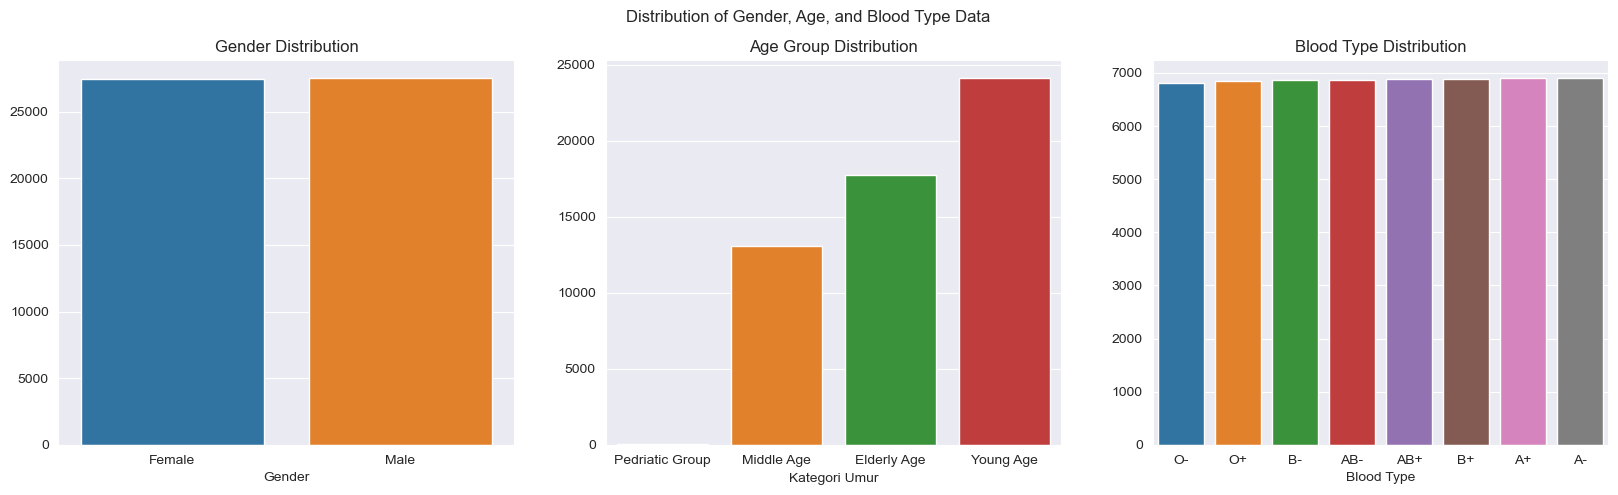

In [84]:
import matplotlib.pyplot as plt
import seaborn as sns

# Creating subplots with 1 row and 3 columns, not sharing the x-axis, and setting the figure size
figure, axes = plt.subplots(1, 3, sharex=False, figsize=(20, 5))

# Setting the main title of the figure
figure.suptitle('Distribution of Gender, Age, and Blood Type Data', fontsize=12)

# Sorting the data in ascending order
gender_sorted = gender.sort_values()
age_sorted = KelompokUmur.sort_values()
blood_sorted = blood.sort_values()

# Plotting Gender Distribution
sns.barplot(ax=axes[0], x=gender_sorted.index, y=gender_sorted.values)
axes[0].set_title('Gender Distribution')

# Plotting Age Group Distribution
sns.barplot(ax=axes[1], x=age_sorted.index, y=age_sorted.values)
axes[1].set_title('Age Group Distribution')

# Plotting Blood Type Distribution
sns.barplot(ax=axes[2], x=blood_sorted.index, y=blood_sorted.values)
axes[2].set_title('Blood Type Distribution')

# Setting the style of seaborn plots to "darkgrid"
sns.set_style("darkgrid")

# Show plot
plt.show()


From the distribution of **gender** between males and females, it is found that the number of males and females is around **27,000** each, indicating a balanced distribution between the two.  

From the **age** category distribution, it is found that the **Pediatric Age** Group has the smallest number, which is not visible in the graph due to being too small, with a total of **32**. This is followed by the **Middle Age** group with around **13,000**, the **Elderly Age** group with around **17,000**, and the largest group being the **Young Age** with around **24,000**.  

From the distribution of blood types, it is found that the number of each **blood type** is around **6,800**, indicating a balanced distribution among the blood types.

---

#### **2. What are the medical conditions of the patients based on age?**

To answer these questions, we first group individuals based on age group and medical condtion, and then count medical condition for each unique value.

In [85]:
# Group by age group and medicala condition 
Medical = df.groupby(['Kategori Umur','Medical Condition'])['Medical Condition'].count()
Medical = Medical.sort_values(ascending=False)
Medical

Kategori Umur    Medical Condition
Young Age        Arthritis            4043
                 Obesity              4035
                 Diabetes             4019
                 Cancer               4006
                 Hypertension         4001
                 Asthma               4000
Elderly Age      Asthma               2993
                 Arthritis            2992
                 Hypertension         2986
                 Cancer               2961
                 Diabetes             2953
                 Obesity              2868
Middle Age       Diabetes             2242
                 Obesity              2231
                 Arthritis            2177
                 Cancer               2169
                 Hypertension         2162
                 Asthma               2096
Pedriatic Group  Obesity                12
                 Asthma                  6
                 Arthritis               6
                 Cancer                  4
                 Di

Now we will visualize it using horizontal bar plots.

<Axes: ylabel='Kategori Umur,Medical Condition'>

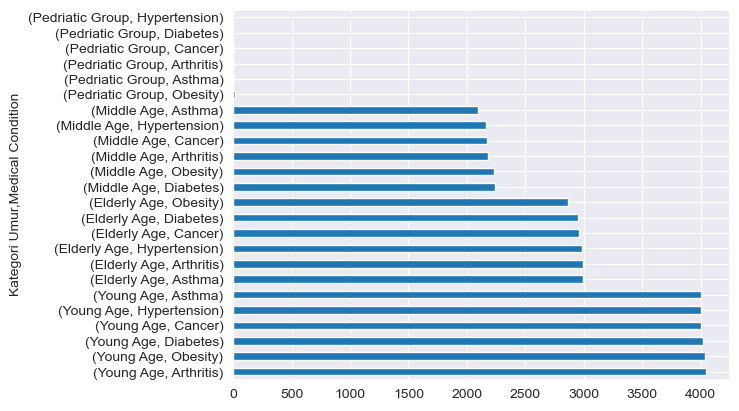

In [86]:
# Visualize using horizontal bar plots
Medical.plot(kind='barh')

The chart shows the distribution of various medical conditions across different age categories. The Young Age group has the highest prevalence, with around **4,000 cases** for each condition (**Obesity**, **Hypertension**, **Diabetes**, **Cancer**, **Asthma**, and **Arthritis**). The Pediatric Group has the lowest prevalence, which is not visible in the graph, making it the least represented. The Middle Age group has a moderate prevalence, with approximately around **2,000** cases per condition, while the Elderly Age group has a slightly higher prevalence, with around **2900** cases per condition. This highlights that medical conditions are most common in the Young Age group, followed by the Elderly Age, Middle Age, and Pediatric groups.

---

#### **3. Which hospital has the most expensive treatment costs?**

To address these questions, we start by grouping individuals according to the hospitals they visited and then calculate the mean billing amount for each hospital. After calculating the means, we proceed to sort the values and select the top 5.

In [87]:
# Grouping individual according to hospital
hospital  = df.groupby('Hospital')['Billing Amount'].mean()
# Make it to data frame
hospital = pd.DataFrame(hospital)
# Sort the values 
hospital = hospital.sort_values(by=['Billing Amount'], ascending=False)
# Pick top 5
hospital = hospital.head(5)
hospital

,Billing Amount
Hospital,
Hernandez-Morton,52373.032374
Walker-Garcia,52170.036854
Ruiz-Anthony,52154.237722
George-Gonzalez,52102.240889
Rocha-Carter,52092.669896


Now we will visualize it using line plots.

<Axes: xlabel='Hospital'>

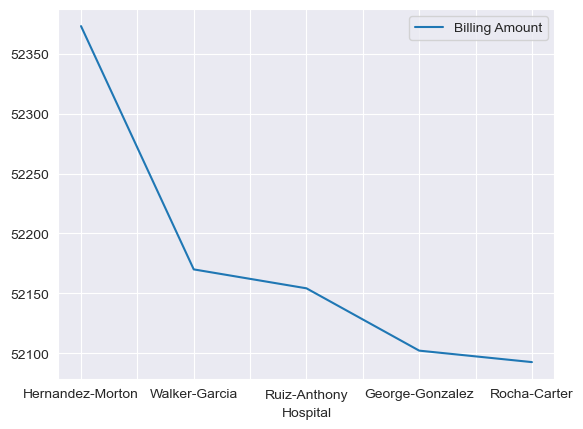

In [88]:
# Visualize using horizontal line plots
hospital.plot(kind='line')

"The line chart displays the top 5 hospitals with the highest treatment costs. The most expensive is Hernandez-Morton Hospital, at around **52,000**, followed by Walker-Garcia Hospital, Ruiz-Anthony Hospital, George-Gonzalez Hospital, and Rocha-Carter Hospital."

---

#### **4. Which drugs are used based on the disease suffered**

To address these questions, we start by grouping individuals according to the Medical Condition and Medication and then count medication for each unique value.

In [89]:
# Group by Medical condition and medication and count medication 
Obat = df.groupby(['Medical Condition','Medication'])['Medication'].count()
# Sorting Obat in ascending order.
Obat = Obat.sort_values(ascending=False)
Obat

Medical Condition  Medication 
Cancer             Lipitor        1904
Arthritis          Aspirin        1901
Diabetes           Lipitor        1875
Hypertension       Ibuprofen      1874
Obesity            Penicillin     1872
Asthma             Paracetamol    1870
Diabetes           Penicillin     1865
Cancer             Ibuprofen      1862
Arthritis          Paracetamol    1858
Obesity            Aspirin        1853
Diabetes           Ibuprofen      1846
Hypertension       Aspirin        1845
Arthritis          Penicillin     1844
Hypertension       Paracetamol    1839
Diabetes           Aspirin        1836
Obesity            Ibuprofen      1834
Cancer             Paracetamol    1829
Asthma             Penicillin     1828
Hypertension       Lipitor        1823
Asthma             Lipitor        1814
Obesity            Lipitor        1812
Arthritis          Lipitor        1810
                   Ibuprofen      1805
Asthma             Ibuprofen      1802
Diabetes           Paracetamol   

Now we will visualize it using line plots.

<Axes: ylabel='Medical Condition,Medication'>

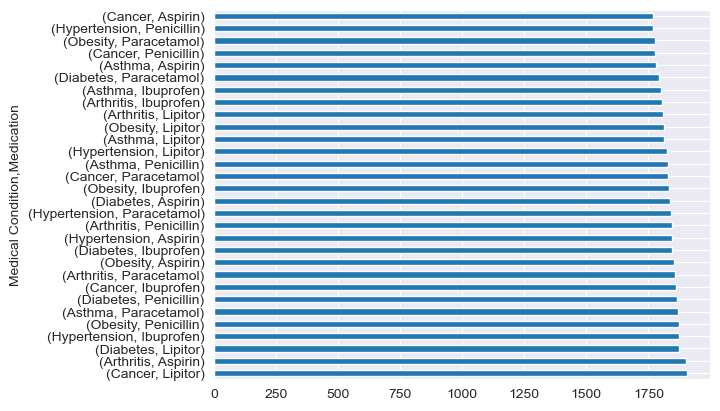

In [90]:
# Visualize using horizontal bar plot
Obat.plot(kind='barh')

The chart shows which medicines are used for different sicknesses. Most cancer patients take Lipitor, followed by arthritis patients using Aspirin. Other combinations are used too, but cancer patients taking Aspirin are the fewest.

---

#### **5. Is there a correlation between age and bill amount?**

To address these questions, we begin by examining the distribution of data using a skewness test.

In [91]:
# Skewness test
df['Age'].skew()

-0.005677678307097651

The skewness obtained is **-0.00567**, which falls between **-0.5** and **0.5**, indicating that the data distribution is **symmetrical** and **normal**. Skewness testing is also conducted on the billing amount.

In [92]:
# Skewness test
df['Billing Amount'].skew()

-0.001304484496984179

The skewness obtained is **-0.0013**, which falls between **-0.5** and **0.5**, indicating that the data distribution is **symmetrical** and **normal**. 

Because of the normal distribution, we will use **Pearson** correlation to analyze the correlation between Age and Billing Amount. Since we are analyzing correlation, we need to establish hypotheses:

H0: There is no correlation between Age and Billing Amount.    
H1: There is a correlation between Age and Billing Amount.

In [93]:
# Calculate r-correlation and P-value using Pearson
corr_r, pval_p = stats.pearsonr(df['Age'], df['Billing Amount'])
print(f"r-correlation: {corr_r:.2f}, p-value: {pval_p}")

r-correlation: -0.00, p-value: 0.4217619862741638


The correlation coefficient (r) obtained is **0.00**, indicating no correlation between Age and Billing Amount. With a p-value of **0.421**, assuming a chosen critical value of **0.05**, since the p-value is greater than the critical value, we fail to reject the null hypothesis (H0). Therefore, there is no correlation between Age and Billing Amount.

Now we will visualize it using a **Heatmap**. To create the heatmap, we need to create a new data frame containing only numerical values.

In [94]:
# Make new data frame which contain only numerical value
df1 = df[['Age','Billing Amount']]
# Testing correlation
df1.corr()

,Age,Billing Amount
Age,1.000000,-0.003427
Billing Amount,-0.003427,1.000000


It can be observed that the correlation between Billing Amount and Age (vice versa) is only **-0.003437**, which is very close to 0. Therefore, it can be concluded that there is **no correlation** between Age and Billing Amount. Now visualize it using heatmap

<Axes: >

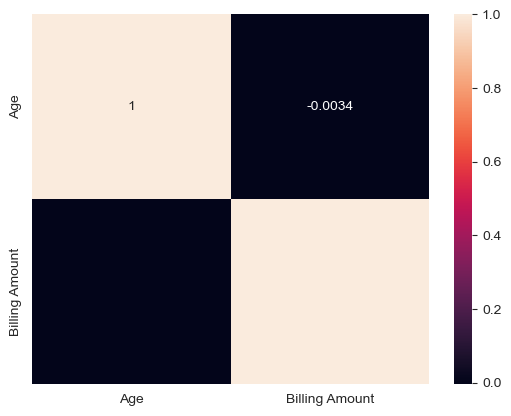

In [95]:
# Visualize using heatmap
sns.heatmap(df1.corr(),annot=True)

---

#### **6. What is the correlation between medication and test result?**

Because the correlation is between two categorical values, we will use the chi-square test to analyze the correlation between medication and test result. First, to perform the chi-square test, we need to create a cross-table

In [96]:
# Importing chi2_contingency from scipy.stats
from scipy.stats import chi2_contingency
# Make cross table between Medication and Test Result
cross_tab = pd.crosstab(index=df['Medication'],columns = df['Test Results'])
cross_tab

Test Results,Abnormal,Inconclusive,Normal
Medication,,,
Aspirin,3700,3588,3696
Ibuprofen,3711,3613,3699
Lipitor,3670,3720,3648
Paracetamol,3695,3646,3624
Penicillin,3661,3631,3664


After creating the cross table, as we are analyzing correlation, it's necessary to establish hypotheses.  
H0: There is no correlation between Medication and Test Results.    
H1: There is a correlation between Medication and Test Results.

Now we use chi-square test 

In [97]:
# Chi square test on cross tab
chi_sq_result = chi2_contingency(cross_tab,)
# Calculate P-value 
p_value = chi_sq_result[1]
p_value

0.8702336848030592

The p-value obtained is **0.87**, assuming a chosen critical value of **0.05**, since the p-value is greater than the critical value, we fail to reject the null hypothesis (H0). Therefore, there is no correlation between Medication and Test Results.

---
---

After the analysis is completed, the conclusion will be drawn next

---

<pre>
</pre>

### ***Conclusion***

---

In conclusion, the data shows an equal number of males and females, with varying numbers across different age groups. The younger age group has more medical problems. Most hospitals have similar costs, but some are more expensive. Different illnesses require different medications. Interestingly, the cost of healthcare isn't related to age, and medication doesn't affect test results. Understanding these patterns can help improve healthcare by ensuring resources are used wisely and treatments are effective for everyone.

---